# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importando Biblioteca Pessoal

In [ ]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/*.py

'/content/drive/My Drive/Colab Notebooks/BibliotecaPessoal.py'


In [ ]:
!cat '/content/drive/My Drive/Colab Notebooks/Arquivo.py'

cat: '/content/drive/My Drive/Colab Notebooks/Arquivo.py': No such file or directory


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

In [ ]:
from BibliotecaPessoal import Arquivo

In [ ]:
resposta = input('Posso salvar o arquivo de saída como resultados.txt (sim ou nao)? ')
if resposta[0].lower() != 's':
  resposta = input('Informe o nome do arquivo que deseja salvar (sem a extensão): ')
resposta+= '.txt'
arquivo = Arquivo(resposta)

Posso salvar o arquivo de saída como resultados.txt (sim ou nao)? talvez
Informe o nome do arquivo que deseja salvar (sem a extensão): resultados
Os dados de saída serão salvos no arquivo  resultados.txt


# Importando o dataset

In [ ]:
dados = pd.read_csv('/content/drive/My Drive/Colab Notebooks/data.csv')

# Análise do Dataset


In [ ]:
dados.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,...,X140,X141,X142,X143,X144,X145,X146,X147,X148,X149,X150,X151,X152,X153,X154,X155,X156,X157,X158,X159,X160,X161,X162,X163,X164,X165,X166,X167,X168,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,-10,35,64,113,152,164,127,50,-47,-121,-138,-125,-101,-50,11,39,24,48,64,46,13,-19,-61,-96,-130,-132,-116,-115,-71,...,54,90,111,107,64,32,18,-25,-69,-65,-44,-33,-57,-88,-114,-130,-114,-83,-53,-79,-72,-85,-109,-98,-72,-65,-63,-11,10,8,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,232,237,258,212,2,-267,-605,-850,-1001,-1109,-1090,-967,-746,-464,-152,118,318,427,473,485,447,397,339,312,314,326,335,332,324,310,...,27,146,229,269,297,307,303,305,306,307,280,231,159,85,51,43,62,63,63,69,89,123,136,127,102,95,105,131,163,168,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,-99,-94,-96,-104,-103,-92,-75,-69,-69,-53,-37,-14,-10,-39,-78,-102,-98,-80,-54,-40,-35,-39,-32,-13,7,34,41,33,6,...,-82,-107,-126,-124,-108,-84,-68,-61,-56,-63,-62,-33,1,28,45,37,48,62,80,66,23,-11,-39,-44,-42,-45,-48,-42,-6,29,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,-72,-68,-74,-80,-83,-73,-68,-61,-58,-59,-64,-79,-84,-97,-94,-84,-77,-75,-72,-68,-76,-76,-72,-67,-69,-69,-69,-67,-68,...,-69,-66,-74,-69,-61,-51,-45,-45,-49,-58,-64,-78,-80,-90,-87,-83,-78,-64,-38,-22,-29,-42,-51,-68,-71,-69,-69,-74,-74,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,-90,-103,-84,-43,-9,3,-21,-60,-96,-103,-75,-29,14,55,78,73,28,-13,-43,-68,-78,-75,-55,-41,-19,-20,-29,-36,-20,...,38,26,10,-4,-13,-8,0,10,19,29,57,63,45,7,-13,-23,-9,9,11,3,-1,-2,4,18,27,27,14,15,11,10,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed: 0 to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [ ]:
dados.columns

Index(['Unnamed: 0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9',
       ...
       'X170', 'X171', 'X172', 'X173', 'X174', 'X175', 'X176', 'X177', 'X178',
       'y'],
      dtype='object', length=180)

In [ ]:
data = dados[dados.columns[1:-1]]
target = dados[dados.columns[-1]]

In [ ]:
dados['y'].value_counts()

5    2300
4    2300
3    2300
2    2300
1    2300
Name: y, dtype: int64

In [ ]:
y = list()
for i in range(5):
  y.append(dados[dados['y'] == i+1].iloc[0][1:-1].astype(int))

In [ ]:
labels = ('Seizure','TumorArea','HealthArea','EyesClosed','EyesOpen')

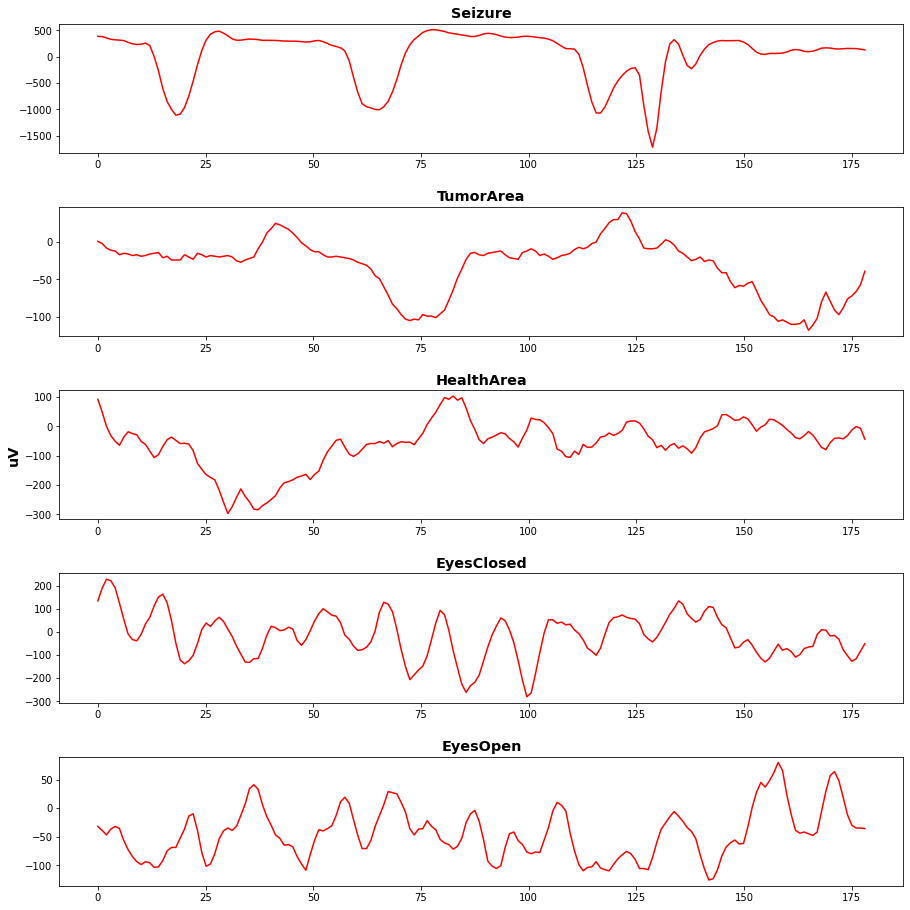

In [ ]:
fig,ax = plt.subplots(5,1,figsize= (13,13))

for i in range(len(y)):
  ax[i].plot(np.linspace(0,len(y[i]),len(y[i])),y[i],'r')
  ax[i].set_title(labels[i], fontsize = 'x-large', fontweight='bold')

ax[2].set_ylabel('uV', fontsize = 'x-large', fontweight='bold')

fig.tight_layout(pad=2.0)

plt.show()

# Aplicando Algorítmos de Predição

## Regressão Logística

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data,target,test_size=0.2)

In [ ]:
lm = LogisticRegression().fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
predict_RL = lm.predict(X_test)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
predict_Knn = knn.predict(X_test)

# Aplicando as métricas de avaliação

In [ ]:
from sklearn import metrics

In [ ]:
accuracyScore = dict()

In [ ]:
accuracyScore['RL'] = metrics.accuracy_score(Y_test,predict_RL)
accuracyScore['KNN'] = metrics.accuracy_score(Y_test,predict_Knn)

In [ ]:
saida = 'Accuracy Score da Regressão Logística: '+ str(accuracyScore['RL'])
arquivo.adicionar(saida)
print(saida)

saida = 'Accuracy Score do KNN: '+ str(accuracyScore['KNN'])
arquivo.adicionar(saida)
print(saida)

Accuracy Score da Regressão Logística: 0.21782608695652175
Accuracy Score do KNN: 0.5452173913043479
